In [1]:
import sys
sys.path.append('../..')

In [2]:
import os
import numpy as np
from lib.path import get_training_data_dir
from lib.pdb import get_all_pdb_names
from data_loader.SingleDataLoader import SingleDataLoader
import matplotlib.pyplot as plt
from lib.water import get_displaceable_water_nums_by_pdb_list, get_non_displaceable_water_nums_by_pdb_list

2024-07-16 17:51:58.668741: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-16 17:51:58.669784: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-16 17:51:58.672616: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-16 17:51:58.681140: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-16 17:51:58.694891: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [3]:
data_dir = '../../../data'
pdb_list_path = os.path.join(data_dir, 'all_protein')

In [4]:
DATA_TYPE1 = 'gr'
DATA_VOXEL_NUM = 10
CLASSIFYING_RULE = 'WaterClassifyingRuleEmbedding'
LIGAND_POCKET_DEFINER = 'LigandPocketDefinerOriginal'
LIGAND_VOXEL_NUM = 8
training_data_dir = get_training_data_dir(DATA_TYPE1, DATA_VOXEL_NUM, CLASSIFYING_RULE, LIGAND_POCKET_DEFINER, LIGAND_VOXEL_NUM)

In [5]:
data_loader = SingleDataLoader(training_data_dir)
gr_data, label = data_loader.load_data(pdb_list_path)

Error processing 2p15: No data found for 2p15
Error processing 2pog: No data found for 2pog
Error processing 3kr4: No data found for 3kr4
Error processing 4ajl: No data found for 4ajl
Error processing 1olu: No data found for 1olu
Error processing 3ebo: No data found for 3ebo
Error processing 2wyg: No data found for 2wyg
Error processing 4lvt: No data found for 4lvt
Error processing 4lxd: No data found for 4lxd
Error processing 2d3u: No data found for 2d3u
Error processing 2d3z: No data found for 2d3z
Error processing 2zkj: No data found for 2zkj
Error processing 2zq0: No data found for 2zq0
Error processing 2j47: No data found for 2j47
Error processing 4jn2: No data found for 4jn2
Error processing 4u0f: No data found for 4u0f
Error processing 5afv: No data found for 5afv
Error processing 3t60: No data found for 3t60
Error processing 3t70: No data found for 3t70
Error processing 4p58: No data found for 4p58
Error processing 4poh: No data found for 4poh
Error processing 4poj: No data fou

2024-07-16 17:52:15.906277: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
SASA = np.load('ligand_pocket_size.npy')

In [7]:
gr_sum = [np.array(gr).sum() for gr in gr_data]

In [8]:
pdb_names = get_all_pdb_names()

In [9]:

displaceable_water_nums_list = get_displaceable_water_nums_by_pdb_list(pdb_names, DATA_VOXEL_NUM, CLASSIFYING_RULE, LIGAND_POCKET_DEFINER, LIGAND_VOXEL_NUM)
non_displaceable_water_nums_list = get_non_displaceable_water_nums_by_pdb_list(pdb_names, DATA_VOXEL_NUM, CLASSIFYING_RULE, LIGAND_POCKET_DEFINER, LIGAND_VOXEL_NUM)

In [10]:
gr_sums = np.array([np.array(gr).sum() for l, gr in zip(label, gr_data) if l == 1])

gr_sum_average_dis = []

count = 0
for water_num in displaceable_water_nums_list:
    if water_num != 0:
        total_sum = np.sum(gr_sums[count : count + water_num])
        gr_sum_average_dis.append(total_sum / water_num)
        count += water_num
    else:
        gr_sum_average_dis.append(0)

In [11]:
gr_sums = np.array([np.array(gr).sum() for l, gr in zip(label, gr_data) if l == 0])

gr_sum_average_non_dis = []

count = 0
for water_num in non_displaceable_water_nums_list:
    if water_num != 0:
        total_sum = np.sum(gr_sums[count : count + water_num])
        gr_sum_average_non_dis.append(total_sum / water_num)
        count += water_num
    else:
        gr_sum_average_non_dis.append(0)

In [12]:
len(gr_sum_average_dis)

2719

In [13]:
SASA.shape, len(gr_sum)

((2719,), 74138)

(1000.0, 8000.0)

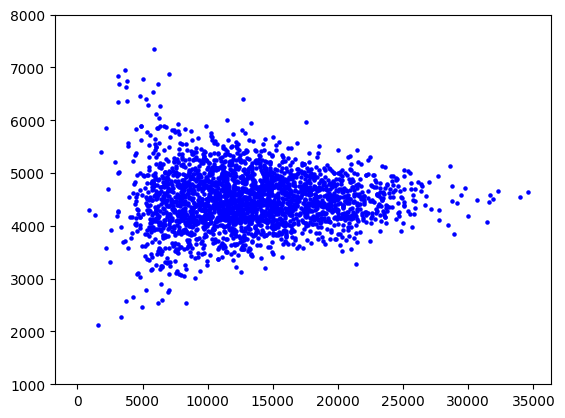

In [17]:
plt.scatter(SASA, gr_sum_average_dis, c='blue', alpha=1, s=5)  # 元のデータポイント
plt.ylim(1000, 8000)  # Y軸の範囲を設定

(1000.0, 8000.0)

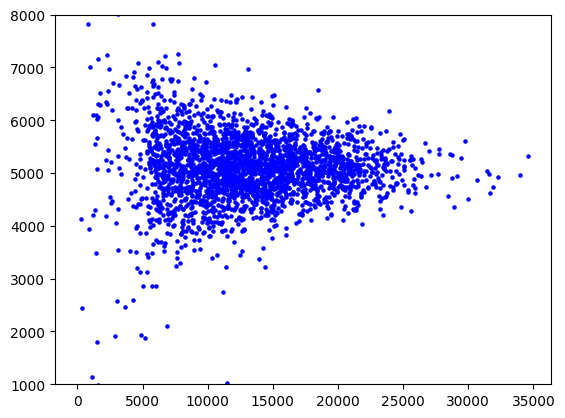

In [18]:
plt.scatter(SASA, gr_sum_average_non_dis, c='blue', alpha=1, s=5)  # 元のデータポイント
plt.ylim(1000, 8000)  # Y軸の範囲を設定

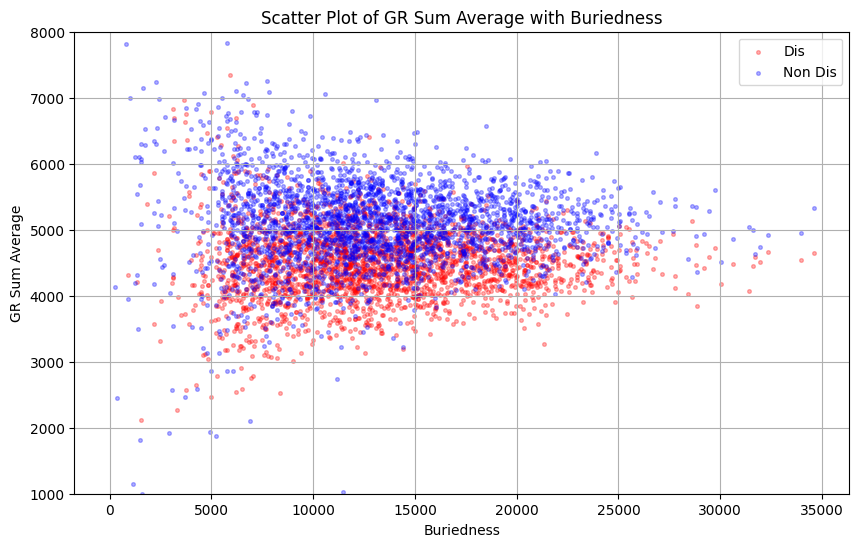

In [19]:
plt.figure(figsize=(10, 6))

# データ1のプロット
plt.scatter(SASA, gr_sum_average_dis, c='red', alpha=0.3, s=7, label='Dis')
# データ2のプロット
plt.scatter(SASA, gr_sum_average_non_dis, c='blue', alpha=0.3, s=7, label='Non Dis')

# Y軸の範囲を設定
plt.ylim(1000, 8000)

# 軸ラベルとタイトルを設定
plt.xlabel('Buriedness')
plt.ylabel('GR Sum Average')
plt.title('Scatter Plot of GR Sum Average with Buriedness')

# 凡例を表示
plt.legend()

# グリッドを表示
plt.grid(True)

# プロットを表示
plt.show()